# Titanic

### Discover Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.shape

(1309, 14)

In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Clean Data

In [8]:
df.drop(["name", "fare", "home.dest"], axis=1, inplace=True)

In [9]:
df["age"] = df["age"].fillna(0)

### Histogram

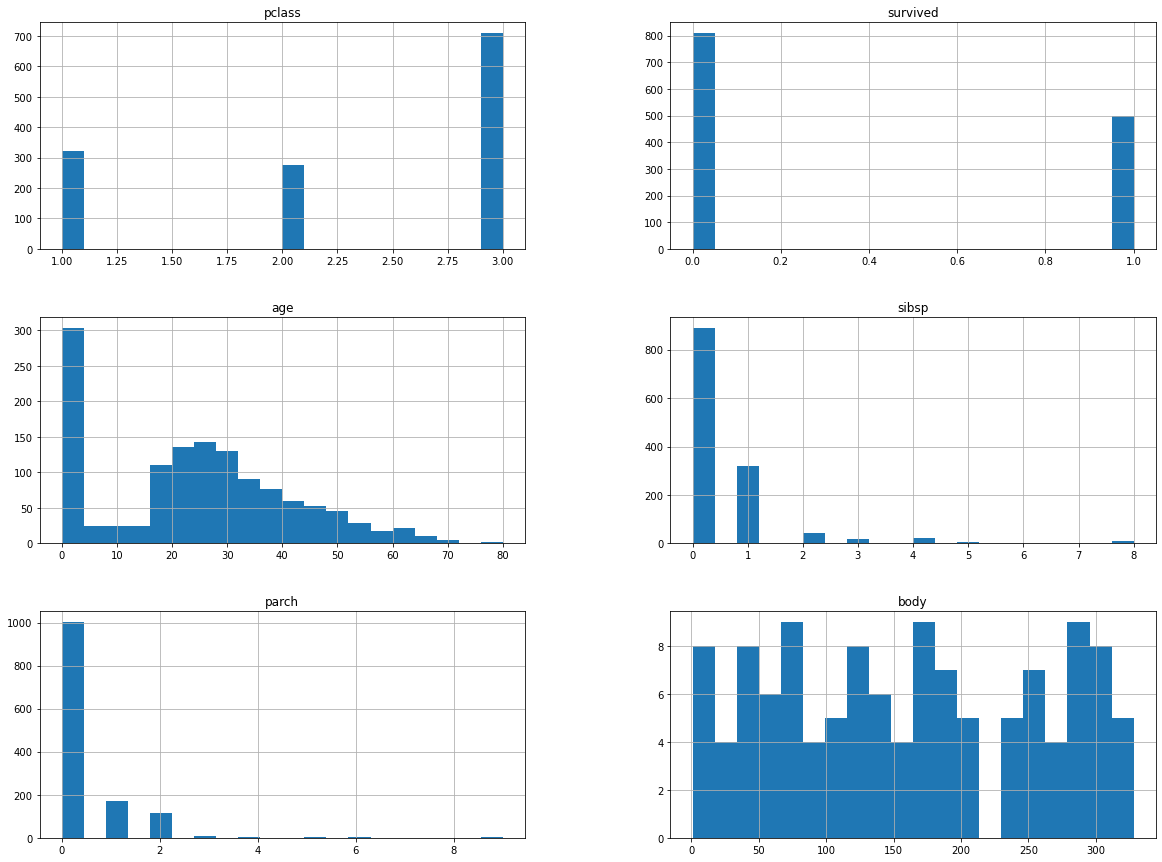

In [15]:
df.hist(bins=20, figsize=(20,15))
plt.show()

### Outliers

In [16]:
df_copy = df.copy()

In [17]:
df_copy["age"][0:10] = 500

<ipython-input-17-f1b5d2a1ec85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["age"][0:10] = 500


In [19]:
df_copy.head(15)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,500.0,0,0,24160,B5,S,2,NaN
1,1,1,male,500.0,1,2,113781,C22 C26,S,11,NaN
2,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
3,1,0,male,500.0,1,2,113781,C22 C26,S,NaN,135.0
4,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
5,1,1,male,500.0,0,0,19952,E12,S,3,NaN
6,1,1,female,500.0,1,0,13502,D7,S,10,NaN
7,1,0,male,500.0,0,0,112050,A36,S,NaN,NaN
8,1,1,female,500.0,2,0,11769,C101,S,D,NaN
9,1,0,male,500.0,0,0,PC 17609,NaN,C,NaN,22.0


In [20]:
df_copy[df_copy["age" ] > 100].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [21]:
df_copy.drop(df_copy[df_copy["age" ] > 100].index, inplace=True)

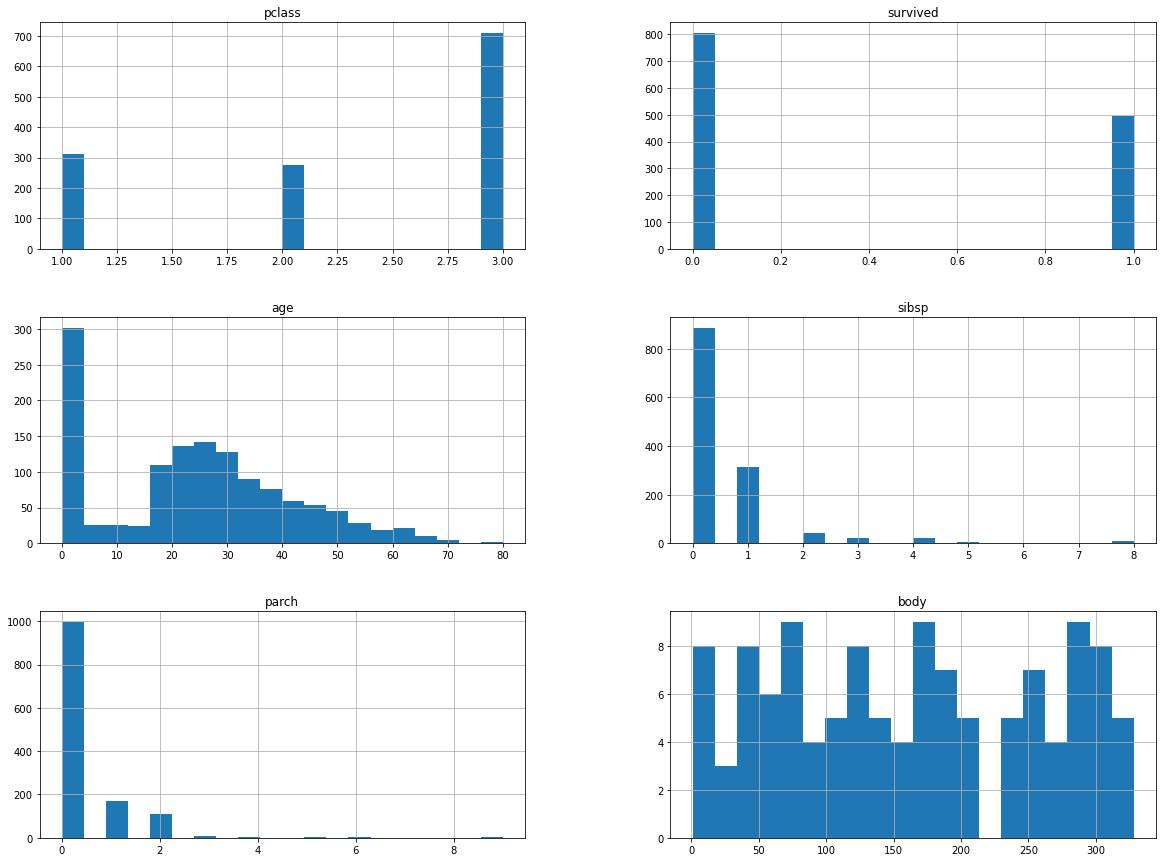

In [22]:
df_copy.hist(bins=20, figsize=(20,15))
plt.show()

In [23]:
df_copy.head(15)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
10,1,0,male,47.0,1,0,PC 17757,C62 C64,C,NaN,124.0
11,1,1,female,18.0,1,0,PC 17757,C62 C64,C,4,NaN
12,1,1,female,24.0,0,0,PC 17477,B35,C,9,NaN
13,1,1,female,26.0,0,0,19877,NaN,S,6,NaN
14,1,1,male,80.0,0,0,27042,A23,S,B,NaN
15,1,0,male,0.0,0,0,PC 17318,NaN,S,NaN,NaN
16,1,0,male,24.0,0,1,PC 17558,B58 B60,C,NaN,NaN
17,1,1,female,50.0,0,1,PC 17558,B58 B60,C,6,NaN
18,1,1,female,32.0,0,0,11813,D15,C,8,NaN
19,1,0,male,36.0,0,0,13050,C6,C,A,NaN


### I'm Alive

In [26]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [27]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [66]:
gender_male = df[df["sex"] == "male"].shape[0]
gender_male

843

In [57]:
male_survied = df[df["sex"] == "male"]["sex"][df["survived"] == 1]
male_survied.shape[0]

161

In [59]:
male_sur_perc = (male_survied.shape[0] / gender_male.shape[0] )*100
male_sur_perc

19.098457888493474

#### Male & Female %

In [100]:
for gen in df["sex"].unique():
    print(gen.title())
    gender_male = df[df["sex"] == gen]
    gender_amount = gender_male.shape[0]
    male_survied = df[df["sex"] == gen]["sex"][df["survived"] == 1]
    survied_amount = male_survied.shape[0]
    male_sur_perc = (survied_amount / gender_amount )*100
    print("Total {}: {} \nTotal Survived: {} \nTotal Percentage : {:.2f}% ".format(gen.title(),
                                                                                   gender_amount,
                                                                                   survied_amount,
                                                                                   male_sur_perc))
    print("======")

Female
Total Female: 466 
Total Survived: 339 
Total Percentage : 72.75% 
Male
Total Male: 843 
Total Survived: 161 
Total Percentage : 19.10% 


#### Survived by Class

In [116]:
for x_class in df["pclass"].unique():
    each_class = df[df["pclass"] == x_class]
    total_class = each_class.shape[0]
    class_survived = each_class["pclass"][df["survived"] == 1]
    total_survived = class_survived.shape[0]
    percetage_survived = (total_survived/total_class)*100
    print("[{}] \nTotal Passengers: {} \nTotal Survived: {} \nPercentage: {:.2f}%".format(x_class, 
                                                                                    total_class,
                                                                                    total_survived,
                                                                                    percetage_survived))
    print("======")

[1] 
Total Passengers: 323 
Total Survived: 200 
Percentage: 61.92%
[2] 
Total Passengers: 277 
Total Survived: 119 
Percentage: 42.96%
[3] 
Total Passengers: 709 
Total Survived: 181 
Percentage: 25.53%


### Classification by age

In [117]:
def age_cat(age):
    if age < 4:
        return 0 
    elif age < 10:
        return 1
    elif age < 21:
        return 2
    elif age < 33:
        return 3
    elif age < 50:
        return 4
    else:
        return 5
    
age_cats = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "young adult",
    4: "adult",
    5: "elder"
}

In [120]:
df["age_phase"] = df["age"]


In [124]:
#1st way
for i in range(df.shape[0]):
    df["age_phase"].iloc[i] = age_cat(df["age"].iloc[i])

In [125]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN,3.0
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN,0.0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN,0.0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0,3.0
4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN,3.0


In [127]:
#2nd way
df["age_phase"] = df["age"].apply(age_cat)

<AxesSubplot:>

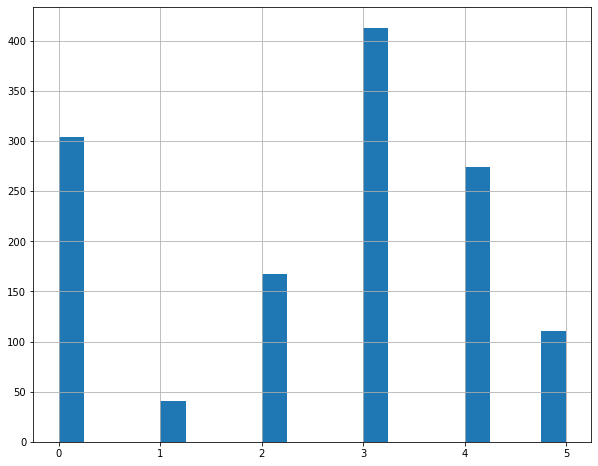

In [128]:
df["age_phase"].hist(bins=20, figsize=(10,8))

In [147]:
for phase in df["age_phase"].unique():
    each_phase = df[df["age_phase"] == phase]
    total_phase = each_phase.shape[0]
    phase_survived = each_phase["age_phase"][df["survived"] == 1]
    total_survived = phase_survived.shape[0]
    total_percentage = (total_survived/total_phase)*100
    print("[{}] \nTotal Persons: {} \nTotal Survived: {} \nPercentage: {:.2f}%".format(age_cats[phase].title(), 
                                                                                    total_phase,
                                                                                    total_survived,
                                                                                    total_percentage))
    print("="*20)

[Young Adult] 
Total Persons: 413 
Total Survived: 158 
Percentage: 38.26%
[Baby] 
Total Persons: 304 
Total Survived: 99 
Percentage: 32.57%
[Adult] 
Total Persons: 274 
Total Survived: 111 
Percentage: 40.51%
[Elder] 
Total Persons: 110 
Total Survived: 44 
Percentage: 40.00%
[Teen] 
Total Persons: 167 
Total Survived: 64 
Percentage: 38.32%
[Child] 
Total Persons: 41 
Total Survived: 24 
Percentage: 58.54%


In [149]:
df.to_csv("new_titanic.csv", sep="\t", encoding="utf8")